Collect all plotting scripts here.

In your analysis, save your histogram results and the binning to two .npy files, so that they can be loaded here. This way we decouple the plotting from running the analysis, we can unify the plot styles, and makes it very easy to tweak the plots during the paper writing process. 

In [1]:
!pip install -r ../requirements.txt

import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

plt.get_backend()

'module://matplotlib_inline.backend_inline'

In [2]:
#Plot style setup
plt.style.use(hep.style.ROOT)

def makeLabel():
    hep.cms.text(exp="Experiment", text="Internal", fontsize=11, loc=0)

#Make figures 3.5 inches wide
figureWidth = 3.5 

mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.labelweight'] = 'bold'

mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['legend.fontsize'] = 8

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

#Let's choose a consistent color scheme for data and MC
dataColor = colors[0]
mcColor = 'black'
oddColor = colors[1]
oddColor2 = colors[2]

print(colors)

#print(mpl.backends.backend_registry.list_builtin(mpl.backends.BackendFilter.NON_INTERACTIVE))

['#5790fc', '#f89c20', '#e42536', '#964a8b', '#9c9ca1', '#7a21dd']


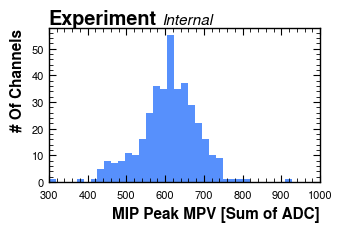

In [21]:

contents = np.load("mpv_hist_contents.npy")
bins = np.load("mpv_hist_bins.npy")

split = []
for i in range(0,len(bins)-1):
    middle = (bins[i]+bins[i+1])/2
    for i in range(0,int(contents[i])):
        split.append(middle)

fig = plt.gcf()
fig.set_size_inches(figureWidth, 2.0)

plt.hist(split, bins=bins, histtype='stepfilled', color=dataColor)
plt.xlim(300,1000)
plt.xlabel("MIP Peak MPV [Sum of ADC]")
plt.ylabel("# Of Channels")
makeLabel()

plt.savefig("MIPPeakMPV.pdf", bbox_inches = "tight")
plt.show()


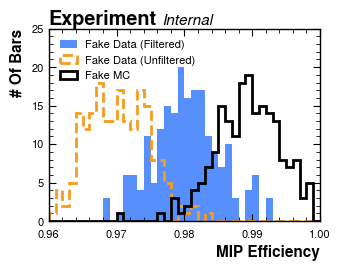

In [65]:
#MIP detection efficiencies

fig = plt.gcf()
fig.set_size_inches(figureWidth, 2.5)

#Fake example data
bins = np.linspace(0.96,1.0,40+1)
datafiltered = np.random.normal(0.98,0.005,200)
dataunfiltered = np.random.normal(0.97,0.005,200)
mc = np.random.normal(0.99,0.005,200)

#Hist type is stepfilled instead of bar, because plt.bar() renders
# one pixel wide gaps between bars
plt.hist(datafiltered, bins, histtype='stepfilled', linewidth=2, label="Fake Data (Filtered)", color=dataColor)
plt.hist(dataunfiltered, bins, histtype='step', linewidth=2, label="Fake Data (Unfiltered)", color=oddColor, linestyle='--')
plt.hist(mc, bins, histtype='step', linewidth=2, label="Fake MC", color=mcColor)

plt.xlim(min(bins),max(bins))
plt.ylim(0,25)
plt.xlabel("MIP Efficiency")
plt.ylabel("# Of Bars")
makeLabel()

plt.legend(loc=0)
plt.savefig("MIPEfficiencyTest.pdf", bbox_inches = "tight")
plt.show()


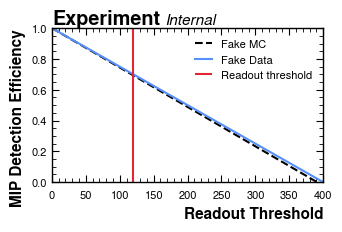

In [66]:
#Mip efficiency curve

fig = plt.gcf()
fig.set_size_inches(figureWidth, 2)

#Fake data
x = np.linspace(0,400,10)
y_data = (x*-0.5+200)/200
y_mc = (x*-0.55+215)/215

plt.plot(x,y_mc, color=mcColor, label="Fake MC", linestyle="--")
plt.plot(x,y_data,color=dataColor, label="Fake Data")

plt.xlim(min(x),max(x))
plt.ylim(0,1)
plt.xlabel("Readout Threshold")
plt.ylabel("MIP Detection Efficiency")
plt.vlines(120, 0,1, label="Readout threshold", color=oddColor2)
makeLabel()
plt.legend(loc=1)

plt.savefig("MIPEfficiencyCurveTest.pdf", bbox_inches = "tight")
plt.show()

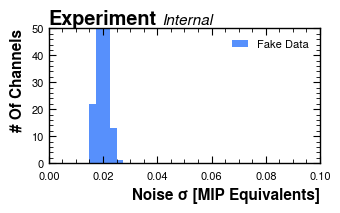

In [76]:
#Noise plot in MIP equivalents

fig = plt.gcf()
fig.set_size_inches(figureWidth, 1.75)

#Fake example data
bins = np.linspace(0.0,0.1,40+1)
data = np.random.normal(0.02,0.002,200)

#Hist type is stepfilled instead of bar, because plt.bar() renders
# one pixel wide gaps between bars

plt.hist(data, bins, histtype='stepfilled', linewidth=2, label="Fake Data", color=dataColor)


plt.xlim(min(bins),max(bins))
plt.ylim(0,50)
plt.xlabel("Noise σ [MIP Equivalents]")
plt.ylabel("# Of Channels")
makeLabel()

plt.legend(loc=0)
plt.savefig("PedestalPeakDistanceTest.pdf", bbox_inches = "tight")
plt.show()
